# Human Activity Recognition using Smartphone Sensor Data

In [1]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings("ignore")
data_path = 'UCI HAR Dataset'

## 1: Importing Dataset

In [2]:
filepath = os.path.join(data_path, 'activity_labels.txt')
activities={}
with open(filepath) as file:
    for line in file:
        key, value = line.strip().split()
        activities[int(key)]=value

filepath = os.path.join(data_path, 'features.txt')
features = [line.split()[1].rstrip('\n') for line in open(filepath)]

In [3]:
filepath = os.path.join(data_path, 'train', 'X_train.txt')
X_train = pd.read_csv(filepath, delim_whitespace=True, header=None)
X_train = pd.DataFrame(X_train.values, columns=features)

filepath = os.path.join(data_path, 'train', 'y_train.txt')
y_train = pd.read_csv(filepath, header=None, dtype=int)
y_train = pd.DataFrame(y_train.values, columns=["Activity"])
y_train.replace({"Activity":activities}, inplace=True)

train_data = pd.concat([X_train, y_train], axis=1)
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [4]:
filepath = os.path.join(data_path, 'test', 'X_test.txt')
X_test = pd.read_csv(filepath, delim_whitespace=True, header=None)
X_test = pd.DataFrame(X_test.values, columns=features)

filepath = os.path.join(data_path, 'test', 'y_test.txt')
y_test = pd.read_csv(filepath, header=None, dtype=int)
y_test = pd.DataFrame(y_test.values, columns=["Activity"])
y_test.replace({"Activity":activities}, inplace=True)

test_data = pd.concat([X_test, y_test], axis=1)
test_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,STANDING


## 2: Build and train a deep learning neural network

In [5]:
ann = MLPClassifier()

In [6]:
hyper_parameters = {
    'solver': ['sgd', 'adam'],
    'activation': ['tanh', 'relu'],
    'hidden_layer_sizes': [(10,20,10), (10,20,20,10), (150,)],
    'alpha': [0.01, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [7]:
model = GridSearchCV(ann, hyper_parameters, n_jobs=-1, cv=3)
model.fit(X_train, y_train)

print('The Hyper-Parameters best for this are:\n', model.best_params_)

The Hyper-Parameters best for this are:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (150,), 'learning_rate': 'constant', 'solver': 'adam'}


## 3: Plot a graph of loss vs the number of epochs

In [8]:
ann = MLPClassifier(activation='relu', alpha=0.05, hidden_layer_sizes=(150,), learning_rate="constant", solver="adam")
ann.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(150,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

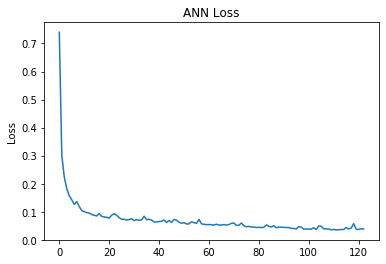

In [9]:
loss_values = ann.loss_curve_
plt.title("ANN Loss")
plt.ylabel("Loss")
plt.plot(loss_values)
plt.show()

## 4: Report the accuracy on the test data

In [10]:
predict = ann.predict(X_test)
accuracy = ann.score(X_test, y_test)
print("Test Set Accuracy: " , accuracy * 100)

Test Set Accuracy:  95.89412962334578


## 5: Explain your choice of the network and the architecture

- For the Best Artificial Neural Network over a wide range of models, The best one has 150 neurons in the hidden layer and input layer has neurons equal to the number of input present at the ann.

- I've used the standard 1000 epochs for this task. The Model will run over the whole dataset 'UCI HAR Dataset' 1000 times and adjusting the weights and the loss and the accuracy.

- And in all of the neurons used the activation function which yields the best results is tanh.

## 6: What are the best hyper-parameter values for your network?

The following configuration of hyperparameters were used:

- The Hidden Layers: (10,20,10), (10,20,20,10), (150,)

- The Activation Functions: tanh, relu

- The Loss Function: Adam Optimizer, Stochastic Gradient Descent

- The Learning rate: 0.01, 0.05 and is constant in one run and is adaptive in the other run.

### Parameters Used

After testing over a wide range of parameters (Grid Search), i've found that a network with

- The Hidden Layers: (150,)

- The Activation Functions: relu

- The Loss Function: Adam Optimizer

- The Learning rate: 0.05 and constant

gives the best result